# Coursework C

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical

import numpy as np



In [2]:
# Load and process MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((-1, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((-1, 28, 28, 1)).astype('float32') / 255


# Random image selection and resize
random_index = np.random.randint(0, len(test_images))
random_image = test_images[random_index]
random_label = test_labels[random_index]

random_image = np.expand_dims(random_image, axis=-1)
random_image = np.expand_dims(random_image, axis=0)



Epoch 1/15
267/267 [==============================] - 2s 6ms/step - loss: 0.6170 - accuracy: 0.8339
Epoch 2/15
267/267 [==============================] - 1s 6ms/step - loss: 0.1855 - accuracy: 0.9462
Epoch 3/15
267/267 [==============================] - 1s 6ms/step - loss: 0.1322 - accuracy: 0.9604
Epoch 4/15
267/267 [==============================] - 2s 6ms/step - loss: 0.1068 - accuracy: 0.9681
Epoch 5/15
267/267 [==============================] - 2s 6ms/step - loss: 0.0912 - accuracy: 0.9725
Epoch 6/15
267/267 [==============================] - 2s 6ms/step - loss: 0.0813 - accuracy: 0.9751
Epoch 7/15
267/267 [==============================] - 2s 6ms/step - loss: 0.0733 - accuracy: 0.9774
Epoch 8/15
267/267 [==============================] - 2s 6ms/step - loss: 0.0673 - accuracy: 0.9797
Epoch 9/15
267/267 [==============================] - 2s 6ms/step - loss: 0.0637 - accuracy: 0.9810
Epoch 10/15
267/267 [==============================] - 2s 6ms/step - loss: 0.0594 - accuracy: 0.9818

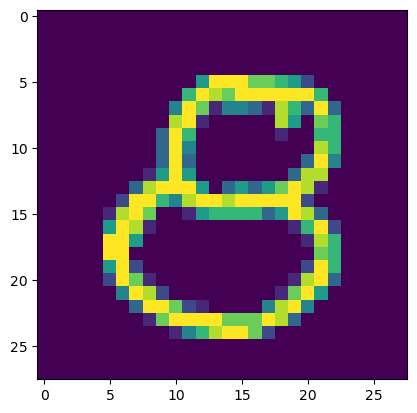

In [3]:
# Convert labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model_1 = Sequential([
    Conv2D(6, (4,4), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(4,4),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_1 = model_1.fit(train_images, train_labels, epochs=15, batch_size = 225)

# Evaluate the model
test_loss_1, test_accuracy_1 = model_1.evaluate(test_images, test_labels)
print("Test accuracy: ", test_accuracy_1)





# Setting up the prediction
probable_model=tf.keras.Sequential([model_1,tf.keras.layers.Softmax()])


# Make a prediction using the trained model
predictions = probable_model.predict(random_image)

# Get the predicted label (index with the highest probability)
predicted_label = np.argmax(predictions)


# Display the image
plt.imshow(random_image.squeeze())

print("The predicted label is ", predicted_label)
print("The accuracy of this model is ", round(test_accuracy_1*100,2), "%")

model_1.summary()



Epoch 1/15
299/299 [==============================] - 10s 33ms/step - loss: 0.3764 - accuracy: 0.8878
Epoch 2/15
299/299 [==============================] - 9s 32ms/step - loss: 0.0936 - accuracy: 0.9711
Epoch 3/15
299/299 [==============================] - 10s 34ms/step - loss: 0.0684 - accuracy: 0.9787
Epoch 4/15
299/299 [==============================] - 9s 32ms/step - loss: 0.0539 - accuracy: 0.9836
Epoch 5/15
299/299 [==============================] - 9s 32ms/step - loss: 0.0464 - accuracy: 0.9856
Epoch 6/15
299/299 [==============================] - 10s 32ms/step - loss: 0.0413 - accuracy: 0.9873
Epoch 7/15
299/299 [==============================] - 9s 31ms/step - loss: 0.0363 - accuracy: 0.9887
Epoch 8/15
299/299 [==============================] - 9s 31ms/step - loss: 0.0321 - accuracy: 0.9899
Epoch 9/15
299/299 [==============================] - 9s 31ms/step - loss: 0.0298 - accuracy: 0.9904
Epoch 10/15
299/299 [==============================] - 9s 31ms/step - loss: 0.0263 - acc

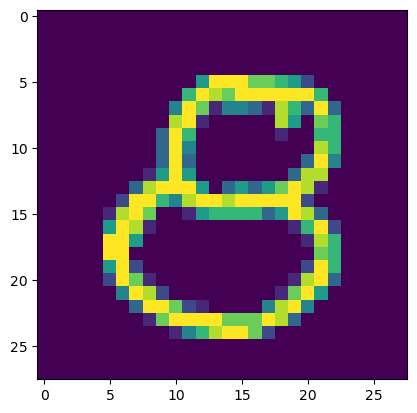

In [12]:
# The beginning of the code is the same as Task 1 (loading and preprocessing data)

model_2 = Sequential()
# Convolutional layer
model_2.add(Conv2D(12, (5,5), activation='relu', input_shape=(28, 28, 1)))
model_2.add(Conv2D(12, (5,5), activation='relu', input_shape=(28, 28, 1)))
model_2.add(Conv2D(12, (5,5), activation='relu', input_shape=(28, 28, 1)))

# Pooling layer
model_2.add(MaxPooling2D((5,5)))
# Flattening the convolved images for the dense layer
model_2.add(Flatten())
# Dense layer
model_2.add(Dense(150, activation='relu'))
# Output layer
model_2.add(Dense(10, activation='softmax'))

# Compile, train, and evaluate the model (similar to Task 1)
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(train_images, train_labels, epochs=15,batch_size=201)


# Setting up the second prediction
probable_model2=tf.keras.Sequential([model_2,tf.keras.layers.Softmax()])


# Making the prediction using the trained model again
prediction2 = probable_model2.predict(random_image)

# Get the prediction
predicted_label2 = np.argmax(prediction2)


# Display the image
plt.imshow(random_image.squeeze())

# Printing the results
print("The predicted label is ", predicted_label2)
print("The accuracy of this model is ", round(test_accuracy_2*100,2), "%")
model_2.summary()
